# CAR PRICE PREDICTION 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv(r"C:\Users\PRADEEPA\Downloads\car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# SHAPE OF OUR DATASET

In [3]:
data.shape
print("number of rows:",data.shape[0])
print("number of columns",data.shape[1])

number of rows: 301
number of columns 9


# INFORMATION OF DATASET

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# CHECK NULL VALUES

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# OVERALL STATISTICS ABOUT DATASET

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# DATA PREPROCESSING

In [7]:
import datetime
date_time=datetime.datetime.now()
data['Age']=date_time.year-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [8]:
data.drop('Year',axis=1,inplace=True)

In [9]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# OUTLIERS REMOVAL

<AxesSubplot:xlabel='Selling_Price'>

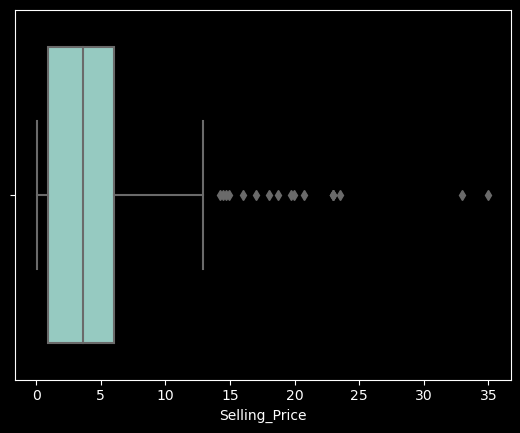

In [10]:
import seaborn as sns
sns.boxplot(data['Selling_Price'])

In [11]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [12]:
data=data[~(data['Selling_Price']>=33.0)&(data['Selling_Price']<=35.0)]

In [13]:
data.shape

(299, 9)

# ENCODING THE CATEGORICAL COLUMNS

In [14]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [17]:
#fuel_type to categorical
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [16]:
data['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [18]:
#seller_type to categorical
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [19]:
data['Seller_Type']=data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [21]:
data['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [23]:
#tramission to categorical
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})

In [25]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

# STORE FEATURES IN  X AND TARGET IN Y

In [40]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [41]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# CORRELATION

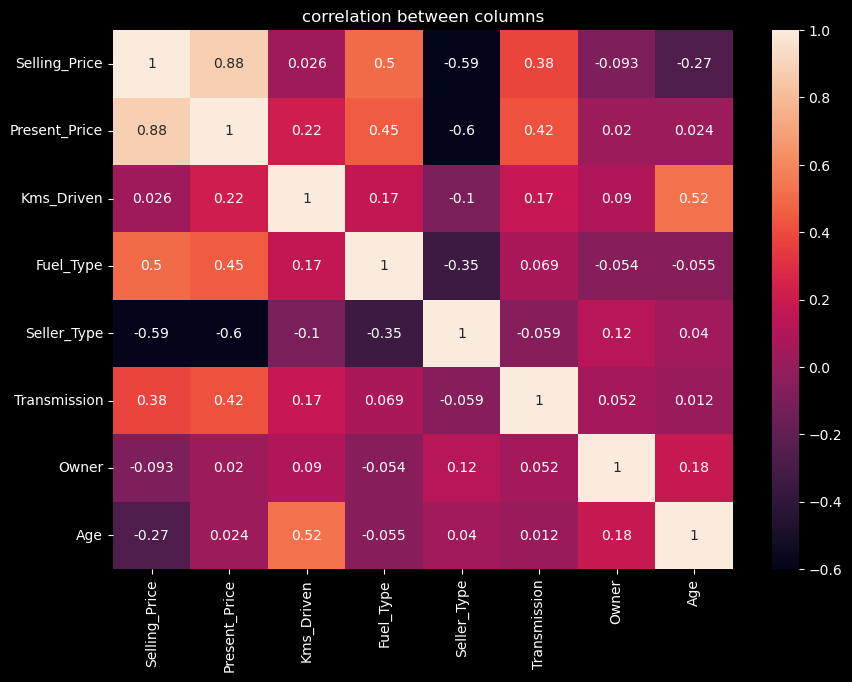

In [42]:
#checking correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title("correlation between columns")
plt.show()

<AxesSubplot:title={'center':'correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

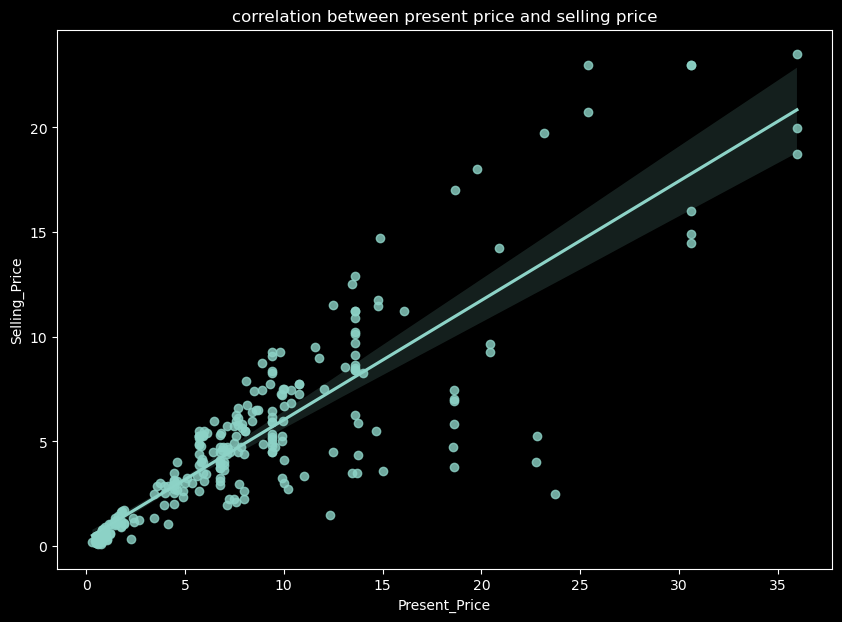

In [43]:
fig=plt.figure(figsize=(10,7))
plt.title("correlation between present price and selling price")
sns.regplot(x='Present_Price',y='Selling_Price',data=data)

# SPLITTING DATA INTO TRAINING AND TESTING DATA

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [46]:
print("X_test shape:",X_test.shape)
print("X_train shape:",X_train.shape)
print("y_test shape:",y_test.shape)
print("y_train shape:",y_train.shape)

X_test shape: (90, 7)
X_train shape: (209, 7)
y_test shape: (90,)
y_train shape: (209,)


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
scaler=StandardScaler()

In [51]:
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [52]:
model=LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
pred=model.predict(X_test)

In [55]:
model.score(X_train,y_train)

0.9081837600330137

In [56]:
model.score(X_test,y_test)

0.7194502260830398

# EVALUATE MODEL

In [57]:
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [58]:
print("MAE:",(metrics.mean_absolute_error(pred,y_test)))
print("MsE:",(metrics.mean_squared_error(pred,y_test)))
print("r2 score:",(metrics.r2_score(pred,y_test)))

MAE: 1.4219140339786551
MsE: 5.7495062129020535
r2 score: 0.7782024377152404


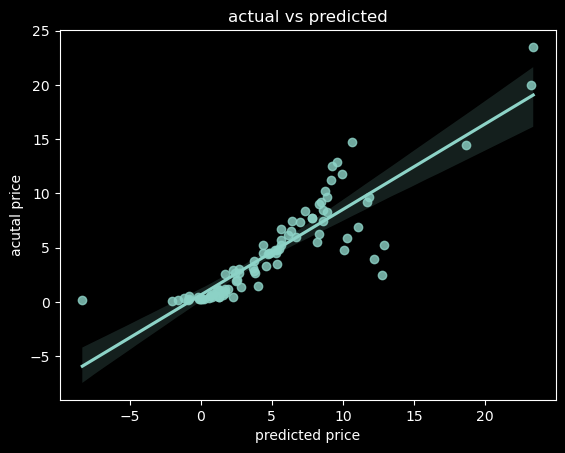

In [59]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("predicted price")
plt.ylabel("acutal price")
plt.title("actual vs predicted")
plt.show()